# ДЗ по "Сбор и разметка данных (семинары)"

## Семинар 9. Инструменты разметки наборов данных

###  Домашнее задание:

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [ ]:
# Устанавливаем пакеты
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install label-studio
!pip install matplotlib
!pip install wget

In [ ]:
import pandas as pd
import nltk
# Загружаем предобученную модель токенизации текста
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import csv
import os
import wget
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import f1_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
# Загрузим датасет с новостями с lenta.ru (https://www.kaggle.com/datasets/yutkin/corpus-of-russian-news-articles-from-lenta)
data = pd.read_csv("lenta-ru-news.csv", engine='python', on_bad_lines="skip")

In [7]:
data

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
694741,https://lenta.ru/news/2017/12/11/vpiterebit/,Петербуржцы с нунчаками атаковали поезд метро ...,"В Санкт-Петербурге три молодых человека, воору...",Россия,Происшествия,2017/12/11
694742,https://lenta.ru/news/2017/12/11/avtosalon/,Менеджера автосалона в Петербурге нашли мертвы...,"Сотрудника петербургского автосалона, заподозр...",Силовые структуры,Следствие и суд,2017/12/11
694743,https://lenta.ru/news/2017/12/11/spaceypleases...,Кевина Спейси обвинили в хватании бывшего зятя...,"Писатель Ари Бен, бывший зять короля Норвегии ...",Культура,Кино,2017/12/11
694744,https://lenta.ru/news/2017/12/11/putin_syria/,Путин прилетел на авиабазу Хмеймим,Президент России Владимир Путин в понедельник ...,Россия,Политика,2017/12/11


In [8]:
# Т.к. датасет очень большой, для дальнейшей работы выберем 2% от первоначального датасета
subset = data.sample(frac=0.020)

In [9]:
subset.to_csv("news_lenta-ru.csv", index=False)
# lenta-ru-news.csv

In [10]:
# Загрузим полученный датасет (2%) с новостями с lenta.ru
news = pd.read_csv("news_lenta-ru.csv", engine='python', on_bad_lines="skip")

In [11]:
news

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2004/02/01/bodyguards/,В Чечне убиты начальник службы безопасности Ка...,В Чечне неизвестные расстреляли одного из кома...,Россия,Все,2004/02/01
1,https://lenta.ru/news/2012/02/27/parrots/,Из украинского зоомагазина похитили три десятк...,В городе Ковель Волынской области Украины огра...,Из жизни,Все,2012/02/27
2,https://lenta.ru/news/2002/01/21/gas/,Путин предложил Ниязову создать газовый альянс,Открывая в Кремле российско-туркменские перего...,Экономика,Все,2002/01/21
3,https://lenta.ru/news/2017/05/30/timeless/,Lacoste снял ролик о вечной любви,Французская компания Lacoste представила рекла...,Ценности,Явления,2017/05/30
4,https://lenta.ru/news/2005/03/23/commandos/,Иракские полицейские оставили боевиков без тре...,Иракские полицейские при поддержке американски...,Мир,Все,2005/03/23
...,...,...,...,...,...,...
13890,https://lenta.ru/news/2009/12/11/eiffel/,На аукцион в Париже выставили лестничный проле...,Французский аукционный дом Друо (Drouot) прове...,Из жизни,Все,2009/12/11
13891,https://lenta.ru/news/2006/11/10/macedonia/,Тренер сборной Македонии признал силу команды ...,Тренерский штаб футбольной сборной Македонии с...,Спорт,Все,2006/11/10
13892,https://lenta.ru/news/2011/03/16/sixpacker/,Задержан похититель шести ящиков пива из моско...,В Москве задержан предполагаемый участник разб...,Россия,Все,2011/03/16
13893,https://lenta.ru/news/2007/12/07/fur/,Британцам продают натуральный мех под видом ис...,Королевское общество по предотвращению жестоко...,Мир,Все,2007/12/07


In [12]:
# Загрузка тонального словаря
url = 'https://raw.githubusercontent.com/dkulagin/kartaslov/master/dataset/kartaslovsent/kartaslovsent.csv'
path = "kartaslovsent.csv"   # Датасет тонального словаря
if not os.path.isfile("kartaslovsent.csv"):
    # Загружаем данные
    wget.download(url, out=path)

In [13]:
df_tone_dictionary = pd.read_csv("kartaslovsent.csv", sep=';', on_bad_lines='skip')

In [14]:
df_tone_dictionary

,term,tag,value,pstv,ngtv,neut,dunno,pstvNgtvDisagreementRatio
0,абажур,NEUT,0.08,0.185,0.037,0.580,0.198,0.00
1,аббатство,NEUT,0.10,0.192,0.038,0.578,0.192,0.00
2,аббревиатура,NEUT,0.08,0.196,0.000,0.630,0.174,0.00
3,абзац,NEUT,0.00,0.137,0.000,0.706,0.157,0.00
4,абиссинец,NEUT,0.28,0.151,0.113,0.245,0.491,0.19
...,...,...,...,...,...,...,...,...
46122,ёмкость,NEUT,0.00,0.167,0.000,0.690,0.143,0.00
46123,ёрзать,NGTV,-0.54,0.050,0.446,0.397,0.107,0.00
46124,ёрничать,NGTV,-0.79,0.078,0.529,0.236,0.157,0.00
46125,ёрш,NEUT,0.16,0.224,0.072,0.576,0.128,0.00


In [15]:
# Присвоение метки настроения заголовкам новостей
# Перемешаем и разделим датафрейм на две части (1-разметка вручную, 2-разметка на основе правил)

In [16]:
# Перемешаем и разделим датафрем на 2 части
title_news_1, title_news_2 = train_test_split(news['title'], train_size=5, random_state=42)

In [17]:
# Преобразуем полученые датасеты в датафреймы Pandas
df_title_news_1 = pd.DataFrame(title_news_1)
df_title_news_2 = pd.DataFrame(title_news_2)

In [18]:
df_title_news_1.head()

,title
5191,Индийцы попросились в арктические шельфовые пр...
13418,На трассе «Россия» образовалась многокилометро...
5390,Названы главные причины отказов при выдаче кре...
860,Завершены допросы Яшина и Удальцова
7270,Мать полицейского арестовали за грабеж банков


In [19]:
df_title_news_2.head()

,title
353,Российские регионы сэкономят на зарплатах бюдж...
2996,У Маккейна нашли рак мозга
8807,"""Реал"" забил шесть голов в матче чемпионата Ис..."
8354,Губернатор Нью-Йорка предложил легализовать од...
8866,Потомки американских рабов судятся со страхово...


In [20]:
# Определение функций

In [21]:
import nltk
# Загружаем предобученную модель токенизации текста
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
# Функция для присвоения метки настроения на основе наличия положительных или отрицательных слов
def get_sentiment(text, df_td=df_tone_dictionary): #   Функция вычисляет метрику настроения
                                                   #   и возвращает оценку тональности:
                                                   #  -0.35 (негативно) <= нейтрально >= (0.55) позитивно
    # Токенизация текста на отдельные слова
    words = nltk.word_tokenize(text.lower())
    sum_value = 0  # Сумма всех значений весов найденных слов

    for word in words:
        if len(df_td[df_td.term == word]):
            df_filtered = df_td[df_td['term'] == word]
            value = df_filtered['value'].iloc[0]
            sum_value += value

    return sum_value

In [23]:
# Определение функции для присвоения метки настроения на основе оценки полярности настроения
def get_sentiment_label(score): #   Функция выводит метку настроения (негативный, позитивный или нейтральный)
                                #   и  возвращает оценку тональности
                                #   уровень метки настроения от -1 до 1,
    if score < -0.35:
        return 'negative'
    elif score >= 0.55:
        return 'positive'
    else:
        return 'neutral'

In [24]:
%%time
get_sentiment('Спортсмен занял первое место в олимпиаде')

CPU times: user 112 ms, sys: 835 µs, total: 112 ms
Wall time: 125 ms


0.9099999999999999

In [25]:
get_sentiment('Затопление территории')

-1.0

In [26]:
get_sentiment('Нормальная обстановка')

0.04

In [27]:
get_sentiment_label(get_sentiment('Спортсмен занял первое место в олимпиаде'))

'positive'

In [28]:
get_sentiment_label(get_sentiment('Затопление территории'))

'negative'

In [29]:
get_sentiment_label(get_sentiment('Нормальная обстановка'))

'neutral'

In [30]:
# Присвоение меток настроения на основе правил

In [31]:
%%time
# Применение функции к столбцу 'title' датасета для получения полярности настроения каждого заголовка новости
df_title_news_2['sentiment'] = df_title_news_2['title'].apply(get_sentiment)
# Применение функции к столбцу 'sentiment' датасета для присваения меток настроения
df_title_news_2['sentiment_label'] = df_title_news_2['sentiment'].apply(get_sentiment_label)

CPU times: user 12min 4s, sys: 3.22 s, total: 12min 7s
Wall time: 12min 16s


In [32]:
df_title_news_2.sample(10)

,title,sentiment,sentiment_label
4663,Реалити-шоу закрыли сразу после премьеры,0.26,neutral
3801,Прокуратура и защита обжаловали арест бывшего ...,0.04,neutral
2968,На Евгения Петросяна подали в суд за затопленн...,-0.23,neutral
10937,Полонскому отказали в сделке со следствием,0.00,neutral
12190,Греческий рыбак поймал статую II века до нашей...,0.05,neutral
10443,Руководство ФИФА отклонило протест Ирана,-1.04,negative
12677,Артисты Cirque du Soleil выступят в «Музеоне»,0.00,neutral
3768,Новую мэрию Москвы построит частный инвестор,0.56,positive
12341,Китай поможет РЖД достроить логистический цент...,0.90,positive
11359,Азербайджан свяжут с Италией газопроводом к 20...,0.00,neutral


In [33]:
df_title_news_2.shape

(13890, 3)

In [34]:
# Присвоение меток настроения в label-studio
# Сохраним датафрем в CSV файл

In [35]:
df_title_news_1.to_csv('news_marking.csv', index=False)

In [36]:
# Запускаем label-studio
!pip install label-studio

In [37]:
!label-studio

=> Database and media directory: /root/.local/share/label-studio
=> Static URL is set to: /static/
=> Database and media directory: /root/.local/share/label-studio
=> Static URL is set to: /static/
Read environment variables from: /root/.local/share/label-studio/.env
get 'SECRET_KEY' casted as '<class 'str'>' with default ''
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /pypi/label-studio/json HTTP/1.1" 200 32786
NumExpr defaulting to 2 threads.

*** WARNING! ***
* Port 8080 is in use.
* Trying to start at 8081
****************

Performing system checks...

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_provider_connection_create" in AllPermissions has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "mode

In [75]:
# Экспортируем размеченный вручную CSV файл и загружаем его в датафрейм

In [76]:
df_title_news_1 = pd.read_csv("test.csv", engine='python', on_bad_lines='skip')

In [77]:
df_title_news_1.head()

,annotation_id,annotator,created_at,id,lead_time,sentiment,title,updated_at
0,1,1,2024-09-29T16:08:25.109948Z,1,18.735,negative,В теракте на юге Израиля один человек погиб и ...,2024-09-29T16:08:33.034497Z
1,2,1,2024-09-29T16:09:05.374325Z,2,13.131,neutral,Анджелина Джоли продаст на аукционе редкую Fer...,2024-09-29T16:17:06.400265Z
2,3,1,2024-09-29T16:09:26.498394Z,3,6.770,positive,В России отметили рост турпотока на одном напр...,2024-09-29T16:09:26.498394Z
3,4,1,2024-09-29T16:09:59.909605Z,4,7.341,neutral,Mercedes отказался от узнаваемого бизнеса со 1...,2024-09-29T16:09:26.498394Z
4,5,1,2024-09-29T16:10:25.863949Z,5,4.486,negative,Сразу два теракта произошли одновременно на юг...,2024-09-29T16:10:25.863949Z


In [78]:
# Оставим только нужные столбцы
df_title_news_1 = df_title_news_1[['title', 'sentiment']].rename(columns={'sentiment': 'sentiment_label'})

In [79]:
df_title_news_1.head()

,title,sentiment_label
0,В теракте на юге Израиля один человек погиб и ...,negative
1,Анджелина Джоли продаст на аукционе редкую Fer...,neutral
2,В России отметили рост турпотока на одном напр...,positive
3,Mercedes отказался от узнаваемого бизнеса со 1...,neutral
4,Сразу два теракта произошли одновременно на юг...,negative


In [80]:
# Объеденим три датафрейма
df_title_news_concat = pd.concat([
    df_title_news_1,
    df_title_news_2,
], axis=0)

In [81]:
# Удалим лишний столбец
del df_title_news_concat['sentiment']

In [82]:
df_title_news_concat.head()

,title,sentiment_label
0,В теракте на юге Израиля один человек погиб и ...,negative
1,Анджелина Джоли продаст на аукционе редкую Fer...,neutral
2,В России отметили рост турпотока на одном напр...,positive
3,Mercedes отказался от узнаваемого бизнеса со 1...,neutral
4,Сразу два теракта произошли одновременно на юг...,negative


In [83]:
df_title_news_concat.shape

(13895, 2)

<Axes: >

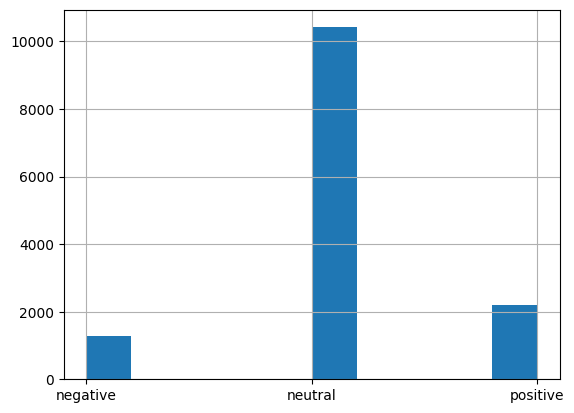

In [84]:
# Выведем график тональности заголовков новостей
df_title_news_concat['sentiment_label'].hist()

In [85]:
# Статистика тональности заголоаков новостей
df_title_news_concat.groupby(['sentiment_label']).agg({'sentiment_label': ['count']})

,sentiment_label
,count
sentiment_label,
negative,1284
neutral,10416
positive,2195


In [86]:
# Обучение модели
le = LabelEncoder()
# Преобразуем в датафрейме буквеное обозначение в цифровое
df_title_news_concat['sentiment_label'] = le.fit_transform(df_title_news_concat['sentiment_label'].astype(str))

In [87]:
df_title_news_concat.head()

,title,sentiment_label
0,В теракте на юге Израиля один человек погиб и ...,0
1,Анджелина Джоли продаст на аукционе редкую Fer...,1
2,В России отметили рост турпотока на одном напр...,2
3,Mercedes отказался от узнаваемого бизнеса со 1...,1
4,Сразу два теракта произошли одновременно на юг...,0


In [88]:
# Перемешивание данных
df_title_news_concat = shuffle(df_title_news_concat)

In [89]:
# Разделение датасета на размеченную и неразмеченную выборки
labeled_title, unlabeled_title = train_test_split(df_title_news_concat, train_size=0.2, random_state=42)

In [90]:
labeled_title.head()

,title,sentiment_label
10005,Официальный курс евро снизился на три с лишним...,2
5977,Кардашьян показала в Instagram арендованный за...,1
5850,Ученые объяснили переедание при недосыпании,0
6852,Московских школьников будут обыскивать с собаками,0
11075,"Счетная палата проверила ОАО ""Российские желез...",1


In [91]:
unlabeled_title.head()

,title,sentiment_label
13315,Скандально известный скульптор создал саркофаг...,2
8358,Просрочка россиян по кредитным картам достигла...,0
10106,Мануфактура Jaeger-LeCoultre посвятила часы Ва...,1
2174,"""Международную амнистию"" попросили признать Хо...",2
10951,Парламент Греции легализовал однополые браки,1


In [92]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_title):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_title['title'])
    y = labeled_title['sentiment_label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [93]:
# Обучение начальной модели на небольшом наборе
model, vectorizer = train_model(labeled_title)

In [94]:
# Использование исходной модели для прогнозирования настроения неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_title['title'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [95]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [96]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_title_new = unlabeled_title.iloc[uncertainty.argsort()[:100]]
unlabeled_title_new = unlabeled_title.iloc[uncertainty.argsort()[100:]]

In [97]:
labeled_title_new

,title,sentiment_label
8417,СМИ сообщили об окружении 1800 боевиков ИГ в ...,1
7059,Глава крупнейшего производителя оружия объявил...,1
6809,"Два вице-президента ""Славнефти"" подозреваются ...",1
1680,Предыдущая солистка «Ленинграда» пренебрежител...,1
8373,В США закрыли нашумевшее дело об убийстве и по...,1
...,...,...
800,Эмир Кустурица привезет в Москву The No Smokin...,1
10174,"В Москве задержаны десятки участников ""Дня гнева""",1
2624,На Кубани отправлены в отставку три вице-губер...,1
7729,Овечкин сделал хет-трик в матче НХЛ,1


In [99]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_title = pd.concat([labeled_title, labeled_title_new])

In [100]:
labeled_title.shape

(2979, 2)

In [101]:
unlabeled_title_new.shape

(11016, 2)

In [102]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_title)

In [103]:
# Оценка обучения модели
# Загружаем тестовый датасет
title_test = pd.read_csv("test_data.csv", engine='python', on_bad_lines='skip')

In [104]:
# Преобразуем в датафрейме буквеное обозначение в цифровое
title_test['sentiment_label'] = le.fit_transform(title_test['sentiment_label'].astype(str))

In [105]:
title_test.sample(10)

,title,sentiment_label
19422,"В субботу в Москве откроются сразу две ""Горбушки""",1
4148,Россия готова в одностороннем порядке ввести в...,1
6176,Александр Васильев cнял телефильм о русских ар...,1
13936,Скандинавы присоединились к Шенгенским соглаше...,1
10390,Родители осуждены на длительные сроки за издев...,2
15410,Храм Спаса на Сенной в Питере восстановят благ...,1
3459,Задержан один из организаторов похода на Дагестан,1
18061,Магазину Amazon.com сошел с рук шпионаж за пол...,0
4534,Глава Сбербанка доложил руководству МВФ об улу...,1
3874,Басаеву не дали стать хозяином телестанции,1


In [106]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(title_test['title'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(title_test['sentiment_label'], y_test_predicted, average='micro')

print(f1)

0.84164


# Вывод:

Выполнена разметка выбранного подмножества на основе правил и произведена разметку вручную другого подмножества.

Объединено две выборки и произведено обучение модели.

**Эффективность обученной модели составила 84,16%.**